In [1]:
%cd ..

d:\ABC\WRSN_load_balancing


In [2]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is F83C-8BED

 Directory of d:\ABC\WRSN_load_balancing

05/06/2024  10:43 AM    <DIR>          .
05/06/2024  10:42 AM    <DIR>          ..
05/06/2024  03:42 PM            13,967 clusters.json
05/06/2024  10:43 AM                 0 hello.txt
05/06/2024  10:43 AM                 1 listTargets.json
05/06/2024  10:43 AM    <DIR>          physical_env
05/06/2024  10:43 AM    <DIR>          runner
               3 File(s)         13,968 bytes
               4 Dir(s)  63,261,237,248 bytes free


Danh sách các thư mục hiện tại:
.git
physical_env
runner
Danh sách các thư mục hiện tại:
.git
physical_env
runner
Danh sách các thư mục hiện tại:
.git
physical_env
runner


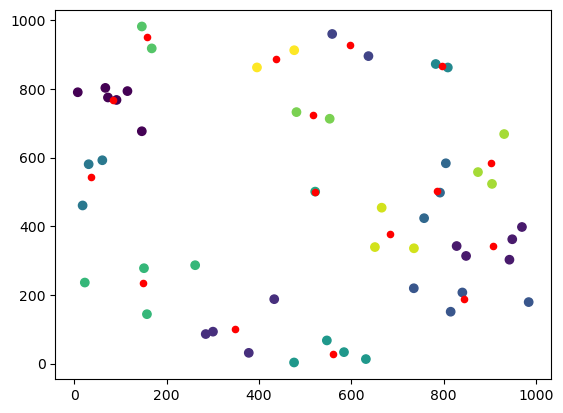

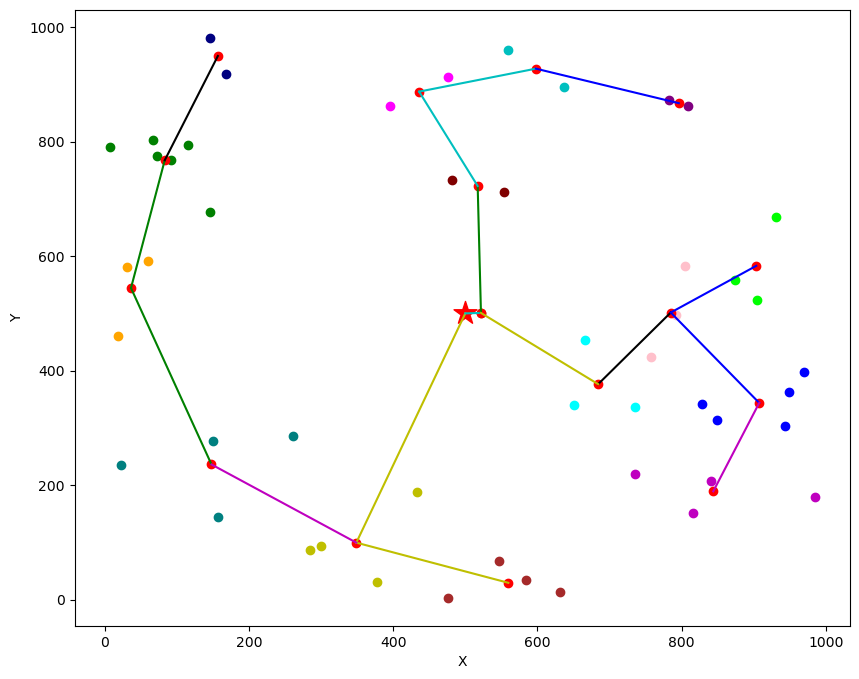

0 [ 83.09563376 767.43542937]
1 [907.71088505 343.67638079]
2 [348.84891704  99.63901875]
3 [597.86736882 927.34841277]
4 [843.99236397 189.28021133]
5 [784.98598667 501.47672597]
6 [ 36.26530765 544.3280873 ]
7 [796.1101502  867.06233707]
8 [559.68314675  29.50801362]
9 [521.71128577 500.78496642]
10 [147.93698842 236.14904153]
11 [156.76009081 949.47849811]
12 [517.15627083 722.47660338]
13 [903.59717075 583.01433574]
14 [684.25974363 376.39326423]
15 [435.91153106 887.22716895]
6


In [3]:
import sys
import os
# sys.path.append(os.path.dirname(os.path.dirname(__file__)))
from physical_env.network.NetworkIO import NetworkIO


netIO = NetworkIO("physical_env/network/network_scenarios/bacgiang_50.yaml")
env, net = netIO.makeNetwork()



In [4]:
for node in net.listNodes:
    print(node.location, type(node))

<Cluster.Cluster object at 0x000002246B668ED0> 0
<Cluster.Cluster object at 0x000002246CE2E0D0> 1
<Cluster.Cluster object at 0x000002246CE2DAD0> 2
<Cluster.Cluster object at 0x000002246CE2FE50> 3
<Cluster.Cluster object at 0x000002246B549290> 4
<Cluster.Cluster object at 0x0000022469138490> 5
<Cluster.Cluster object at 0x000002246CDE8910> 6
<Cluster.Cluster object at 0x000002246CDE8890> 7
<Cluster.Cluster object at 0x000002246CE1EE50> 8
<Cluster.Cluster object at 0x000002246B549390> 9
<Cluster.Cluster object at 0x000002246CE1EF10> 10
<Cluster.Cluster object at 0x000002246CE1F390> 11
<Cluster.Cluster object at 0x000002246CDC2390> 12
<Cluster.Cluster object at 0x000002246CDC2C90> 13
<Cluster.Cluster object at 0x000002246BCCE610> 14
<Cluster.Cluster object at 0x000002246CD63190> 15


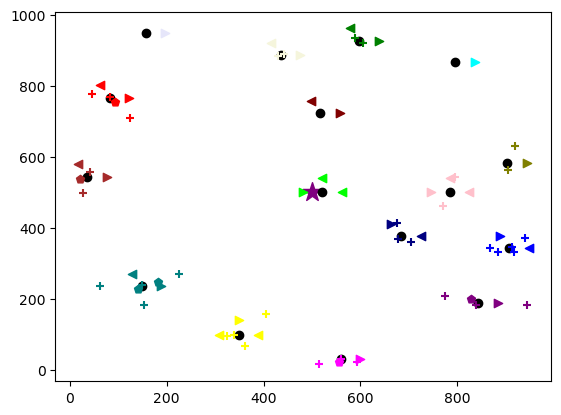

In [5]:
import matplotlib.pyplot as plt


  

plt.figure() 

colors = ['red', 'blue', 'yellow', 'green', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'olive', 'navy', 'beige', 'indigo', 'turquoise']
shapes = ['<', '>', '+', 'p', 'x', '*', '^', 'v', 'h', 's', 'p', 'o']

plt.scatter(net.baseStation.location[0], net.baseStation.location[1], marker= "*", color = "purple",s = 200)
for j in range(0,len(net.listClusters)):
 print(net.listClusters[j],j)
 plt.scatter(net.listClusters[j].centroid[0],net.listClusters[j].centroid[1],color = "black")
 for i in range(0,len(net.listClusters[j].listNodes)):
    x = net.listClusters[j].listNodes[i].location[0]
    y = net.listClusters[j].listNodes[i].location[1]
    z = net.listClusters[j].listNodes[i].__class__.__name__
    if(z == "InNode"): marker_ = shapes[0]
    if(z == "OutNode"):  marker_ = shapes[1]
    if(z == "SensorNode"): marker_ = shapes[2]
    if(z == "ConnectorNode"):  marker_ = shapes[3]
    plt.scatter(x, y, color = colors[j] , marker = marker_)
 for i in range(0,len(net.listClusters[j].listTargets)):
    x = net.listClusters[j].listTargets[i].location[0]
    y = net.listClusters[j].listTargets[i].location[1]
    #plt.scatter(x, y, color = "black")

test_list = []
for node in net.listNodes:
    if node.__class__.__name__ == "RelayNode":
        test_list.append(node)

for node in test_list:
   x = node.location[0]
   y = node.location[1]
   plt.scatter(x, y, color = "orange")




plt.show()

